# Task #3: Exploring Unsupervised Machine Learning
In this task we will be exploring the Iris Dataset and we will be finding the optimum number of clusters and represent it visually.

### 1. Importing Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
from sklearn import datasets
from sklearn.metrics import silhouette_score 
from sklearn.cluster import KMeans

### 2. Loading Dataset

In [2]:
iris = datasets.load_iris()
data = pd.DataFrame(iris.data, columns = iris.feature_names)

### 3. Exploring Dataset

In [3]:
data.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
sepal length (cm)    150 non-null float64
sepal width (cm)     150 non-null float64
petal length (cm)    150 non-null float64
petal width (cm)     150 non-null float64
dtypes: float64(4)
memory usage: 4.8 KB


### 4. Modeling 

We need to find the optimum number of clusters for clustering the dataset, <br>
For that we use two methods, <br>
1. The Elbow Method
2. The Silhouette Method

**The Elbow Method** <br>
Calculate the Within-Cluster-Sum of Squared Errors (WSS) for different values of k, and choose the k for which WSS becomes first starts to diminish. In the plot of WSS-versus-k, this is visible as an elbow. <br>

**The Silhouette Method** <br>
The silhouette score measures how similar a point is to its own cluster (cohesion) compared to other clusters (separation).
We plot silhouette score for different values of K. Value of K for which the highest score is chosen as optimum number of clusters.

<Figure size 1152x576 with 0 Axes>

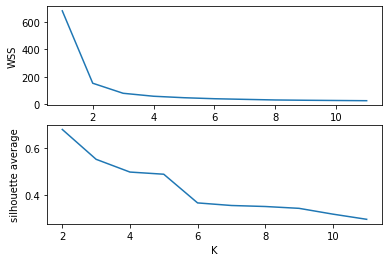

In [5]:
wss = []
silhouette_avg = []
k = [x for x in range(1,12)]

for i in k:
    kmeans = KMeans(n_clusters = i, init = 'k-means++').fit(data)
    wss.append(kmeans.inertia_)
    if i>1:
        silhouette_avg.append(silhouette_score(data, kmeans.labels_))
    
plt.figure(figsize=(16,8))
fig, axs = plt.subplots(2)
axs[0].plot(k, wss)
axs[1].plot(k[1:],silhouette_avg )
axs[0].set_xlabel('K')
axs[0].set_ylabel('WSS')
axs[1].set_xlabel('K')
axs[1].set_ylabel('silhouette average')
plt.show()

We can see that in the first plot there is an ambiguity between K = 2 and K = 3.<br>
The second plot solves the problem. From the second plot we can see that silhouette score is highest for K = 2. So we use number of optimum clusters as 2.

In [6]:
# Predicting using model
km = KMeans(n_clusters = 2, random_state = 5)
km.fit(data)
clusters = km.labels_
clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [7]:
# Attaching the predicted clusters to the dataset
data['Cluster'] = clusters
data.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
5,5.4,3.9,1.7,0.4,1
6,4.6,3.4,1.4,0.3,1
7,5.0,3.4,1.5,0.2,1
8,4.4,2.9,1.4,0.2,1
9,4.9,3.1,1.5,0.1,1


### 5. Visualising Clusters

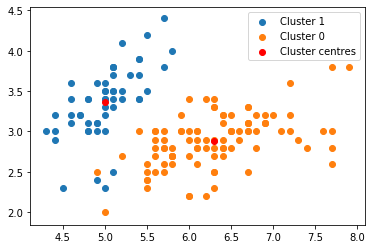

In [8]:
c1 = data[data['Cluster']==1]
c0 = data[data['Cluster']==0]

plt.scatter(c1['sepal length (cm)'], c1['sepal width (cm)'], label = "Cluster 1")
plt.scatter(c0['sepal length (cm)'], c0['sepal width (cm)'], label = "Cluster 0")

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], color = "Red", label = "Cluster centres" )
plt.legend()
plt.show()